## 05 데이터 전처리

- 결손값 처리
- 문차열 피처
  -  카테고리형
  -  피처형

### 데이터 인코딩

#### 레이블 인코딩

**카테고리 피처를 코드형 숫자 값으로 변환**

ex) 냉장고, 전자레인지 -> 1, 2

In [1]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']
#LabelEncoder를 객체로 생성한 수, fit()과 transform()으로 레이블 인코딩 수행
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print("인코딩 변환값:",labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


- 문자열 값이 어떤 값으로 변환했는지 직관적으로 알 수 없음

In [2]:
#인코딩 원본값
print("인코딩 클래스:",encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [3]:
print("디코딩 원본값:", encoder.inverse_transform([4,5,2,0,1,1,3,3,]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- 숫자 값의 경우 대소가 있어 특정 알고리즘에서 가중치가 더 부여되어 예측 성능이 떨어지는 경우가 있음(회귀 알고리즘)


#### 원 -핫 인코딩

In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#숫자값으로 변환하기 위해 LabelEncoder로 변환
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)

#2차원 데이터로 변환
labels=labels.reshape(-1,1)

#원-핫 인코딩
oh_encoder=OneHotEncoder()
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)


원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


- OneHotEncoder로 변환하기 전 모든 문자열 값이 숫자형 값으로 변환되어야 함
- 입력 값으로 2차원의 데이터 필요 

In [5]:
toarray?

Object `toarray` not found.


In [6]:
import pandas as pd
df=pd.DataFrame({'items':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 피처 스케일링과 정규화

- 피처 스케일링: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
  -  표준화
  -  정규화


- fit(): 데이터 변환을 위한 기준 정보 설정 (데이터 세트의 최댓값, 최솟값 설정 등)
- transform(): fit()에서 설정된 정보를 이용해 데이터 변환
- fit_transform(): fit + transform


### StandardScaler

In [7]:
from sklearn.datasets import load_iris
import pandas as pd

iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

print("feature들의 평균 값")
print(iris_df.mean())
print("\nfeature들의 분산 값")
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [8]:
from sklearn.preprocessing import StandardScaler

#StandardScler객체 생성
scaler=StandardScaler()
#StandardScler로 데이터 세트 변환
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())


feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [9]:
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


### MinMaxScaler
- 양수: 0~1 사이의 범위 값으로 변환 
- 음수: -1~1 사이의 범위 값으로 변환

In [10]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [11]:
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


### 학습 데이터와 테스트 데이터 스케일링 변환 시 유의점




In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습데이터는 0~10, 테스트 데이터느 0~5
#Scaler 클래스의 fit(), transform()은 2차원 이상만 가능하므로 reshape(-1,1)로 차원 변경
train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

In [13]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1값으로 변환
scaler=MinMaxScaler()

#fit()하게 되면 train_array 데이터 최솟값이 0, 최댓값이 10
scaler.fit(train_array)

#1/10 scale로 trani_array 데이터 변환, 원본 10->1로 변환됨
train_scaled=scaler.transform(train_array)

print("원본 train_array 데이터:",np.round(train_array.reshape(-1),2))
print("scale된 train_array 데이터:",np.round(train_scaled.reshape(-1),2))


원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [14]:
#fit()하게 되면 test_array 데이터 최솟값이 0, 최댓값이 5
scaler.fit(test_array)

#1/5 scale로 test_array 데이터 변환, 원본 5->1로 변환됨
test_scaled=scaler.transform(test_array)

print("원본 test_array 데이터:",np.round(test_array.reshape(-1),2))
print("scale된 test_array 데이터:",np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


- train_array에서 2가 0.2 test_array에서 1이 0.2인 것 처럼 서로 다른 원본값이 같은 값으로 출력 
- 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 함

In [15]:
scaler=MinMaxScaler()
scaler.fit(train_array)
train_scaled=scaler.transform(train_array)
print("원본 train_array 데이터:",np.round(train_array.reshape(-1),2))
print("scale된 train_array 데이터:",np.round(train_scaled.reshape(-1),2))

#test_array에 scale 변환을 할 경우 fit()을 호출하지 않고 transform만 변환해야함
test_scaled=scaler.transform(test_array)
print("원본 test_array 데이터:",np.round(test_array.reshape(-1),2))
print("scale된 test_array 데이터:",np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


In [16]:
np.reshape?

Signature: np.reshape(a, newshape, order='C')
Docstring:
Gives a new shape to an array without changing its data.

Parameters
----------
a : array_like
    Array to be reshaped.
newshape : int or tuple of ints
    The new shape should be compatible with the original shape. If
    an integer, then the result will be a 1-D array of that length.
    One shape dimension can be -1. In this case, the value is
    inferred from the length of the array and remaining dimensions.
order : {'C', 'F', 'A'}, optional
    Read the elements of `a` using this index order, and place the
    elements into the reshaped array using this index order.  'C'
    means to read / write the elements using C-like index order,
    with the last axis index changing fastest, back to the first
    axis index changing slowest. 'F' means to read / write the
    elements using Fortran-like index order, with the first index
    changing fastest, and the last index changing slowest. Note that
    the 'C' and 'F' options ta

## 06 사이킷런으로 수행하는 타이타닉 생존자 예측

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- Passengerid: 탑승자 데이터 일련번호
- survived: 생존 여부, 0 = 사망, 1 = 생존
- Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
- sex: 탑승자 성별
- name: 탑승자 이름
- Age: 탑승자 나이
- sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
- parch: 같이 탑승한 부모님 또는 어린이 인원수
- ticket: 티켓 번호
- fare: 요금
- cabin: 선실 번호
- embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [18]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- 891개의 행, 12개의 열
- 칼럼의 종류와 수 : float64(2), int64(5), object(5)

**NULL 값 처리**

In [19]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum()) 

데이터 세트 Null 값 갯수  0


In [20]:
print('데이터 세트 Null 값 갯수\n',titanic_df.isnull().sum())

데이터 세트 Null 값 갯수
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [21]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- Cabin 값 분포 N이 특이하게 많으며 , 중복값이 존재하는 등 속성값이 정리X          

In [22]:
titanic_df['Cabin']

0         N
1       C85
2         N
3      C123
4         N
       ... 
886       N
887     B42
888       N
889    C148
890       N
Name: Cabin, Length: 891, dtype: object

In [23]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] #str?
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [24]:
str?

Init signature: str(self, /, *args, **kwargs)
Docstring:     
str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.
Type:           type
Subclasses:     DeferredConfigString, _rstr, LSString, include, ColorDepth, Keys, InputMode, CompleteStyle, SortKey, str_, ...


#### 성별이 생존 확률에 얼마나 영향을 미쳤는가?

In [25]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

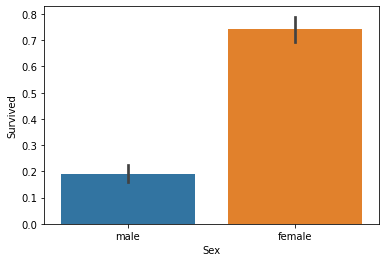

In [26]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

#### 객실 등급별 성별에 따른 생존 확률
- 선실 등급 추가 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

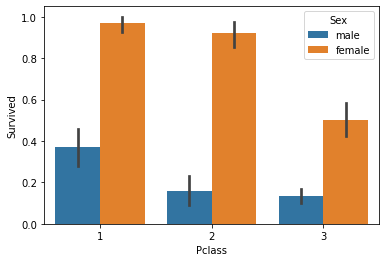

In [27]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

#### 나이에 따른 생존 확률 

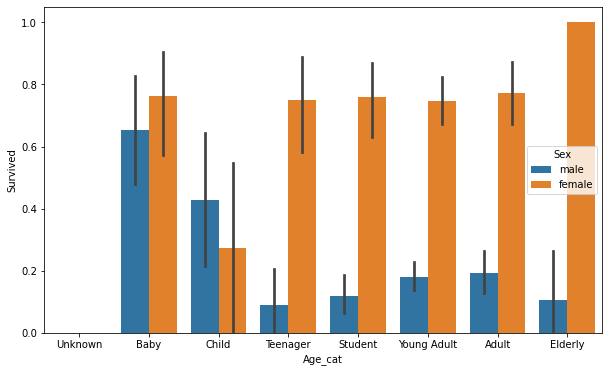

In [28]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)


- 레이블 인코딩

In [29]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [30]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

#### 

In [31]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('./train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df) #전처리 

**테스트 데이터 추출**

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

**의사결정 트리/ 랜덤 포레스트/로지스틱 회귀**

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**교차검증**

In [34]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 


교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [36]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


## 과제1 

### Iteration: 순회
**배열 등의 자료구조를 반복문을 통해 원소 하나씩 인덱싱 하는 것**

In [37]:
a=[1,2,3,4,5]
for i in a:
    print(i)

1
2
3
4
5


for loop를 통해 a 라는 리스트(또는 배열)의 원소를 순회했다

### Iterable
**순회할 수 있는 모든 객체**

**다른 말로 하면 파이썬에서 for 문의 in 키워드 뒤에 올 수 있는 모든 값은 Iterable이다**

- array, string, set, map 등 

###  Iterator
**상태를 유지하며 반환할 수 있는 마지막 값까지 원소를 필요할 때마다 하나씩 반환하는 것**

**리스트, 튜플, 셋, 딕셔너리 등 요소가 복수인 컨테이너에서 각 요소를 하나씩 꺼내 어떤 처리를 수행할 수 있도록 하는 간편한 방법을 제공하는 객체**

**next()메서드**
- argument가 존재하지 않는다
- 반환은 value,done 속성을 퐘한 객체다
- 순회가 끝나면 {value:undefiend, done:true}

한 Iterable에 대한(가령 [1, 2, 3, 4]) 서로 다른 Iterator를 만들어서 한 Iterator는 2까지 반환해서 다음 반환값이 3에 머무르게 하고, 다른 Iterator는 4까지 모두 반환해서 더 이상 반환할 값이 없도록 할 수 있다는 것


### generator

**iterator의 한 종류로, 하나의 요소를 꺼내려고 할 때마다 generator를 수행하는 타입**

**yield문을 통해 구현**


In [38]:
from random import randint 
def random_number_generator(n): 
    count = 0 
    while count < n: 
        yield randint(1, 100) 
        count += 1

In [39]:
g = random_number_generator(5) 
print(g)

<generator object random_number_generator at 0x0000020FF942C200>


In [40]:
print(next(g))
print(next(g))
print(next(g))

98
30
30


In [41]:
print(next(g))
print(next(g))
print(next(g))

15
73


StopIteration: 

총 5번의 호출 이후 StopIteration이 반환

## 과제2

### df.values
**DataFrame 요소를 Numpy 형태(numpy.ndarray)로 반환**

In [ ]:
df.values?

In [ ]:
df,value

In [ ]:
col1 = [1, 2, 3, 4]
col2 = ['one', 'two', 'three', 'four']
col3 = [1.5, 2.5, 3.5, 4.5]
col4 = [True, False, False, True]
index = ['row1','row2','row3','row4']
df = pd.DataFrame(index=index, data={"col1": col1, "col2": col2, "col3": col3, "col4": col4})
print(df)

In [ ]:
result = df.values
print(result)

### to_dict(orient='dict', into=)
**데이터프레임 객체를 dict 형태로 변환하는 메서드**
- orient : 출력할 dict의 형태를 지정
- into : 반환값의 모든 매핑에 사용되는 collections.abc.Mapping 하위클래스

In [ ]:
df.to_dict?

In [ ]:
df = pd.DataFrame([[1,2],[3,4]], columns=['col1','col2'],index=['row1','row2'])
print(df)

In [ ]:
print(df.to_dict(orient='dict'))

In [ ]:
print(df.to_dict(orient='list'))

In [ ]:
print(df.to_dict(orient='series'))

In [ ]:
print(df.to_dict(orient='split'))

In [ ]:
print(df.to_dict(orient='records'))

In [ ]:
print(df.to_dict(orient='index'))

## list/tuple/set
**자유롭게 변환 가능**

In [43]:
a={1,2,3,4,5}

In [46]:
a=list(a)
print(a,type(a))

[1, 2, 3, 4, 5] <class 'list'>


In [47]:
a=tuple(a)
print(a,type(a))

(1, 2, 3, 4, 5) <class 'tuple'>


In [48]:
a=set(a)
print(a,type(a))

{1, 2, 3, 4, 5} <class 'set'>
